In [2]:
from google.colab import files
upload=files.upload()

Saving takehome_user_engagement.csv to takehome_user_engagement.csv
Saving takehome_users.csv to takehome_users.csv


In [69]:
# importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [35]:
user_df = pd.read_csv('/content/takehome_users.csv', encoding= 'latin-1', engine='python', parse_dates=True)
user_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [36]:
user_df.shape

(12000, 10)

In [37]:
user_engage_df = pd.read_csv('/content/takehome_user_engagement.csv', encoding= 'latin-1', engine='python', parse_dates=True)
user_engage_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [38]:
user_engage_df.shape

(207917, 3)

In [39]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [40]:
user_engage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [41]:
# Firct we need to convert columns with time to datetime object in both files

user_df['creation_time'] = pd.to_datetime(user_df['creation_time'])
user_df['last_session_creation_time'] = pd.to_datetime(user_df['last_session_creation_time'])
user_engage_df['time_stamp'] = pd.to_datetime(user_engage_df['time_stamp'])

In [54]:
# Now change the coloumn name from object_id to user_id
user_df.rename(columns={'object_id' : 'user_id'})

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1970-01-01 00:00:01.378448055,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1970-01-01 00:00:01.358274517,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1970-01-01 00:00:01.398602716,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1970-01-01 00:00:01.338638159,0,0,6,NaN


In [43]:
# Reset the index of takehome user engagement file
user_engage_df.set_index(['time_stamp'], inplace = True)
#user_engage_df['user_id'] = user_engage_df['user_id'].astype('object')

In [55]:
user_df.head(1)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0


In [45]:
user_engage_df.head(1)

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1


In [46]:
user_engage_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207917 entries, 2014-04-22 03:53:30 to 2014-01-26 08:57:12
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  207917 non-null  int64
 1   visited  207917 non-null  int64
dtypes: int64(2)
memory usage: 4.8 MB


In [47]:
# check for null values
user_df.isnull().sum().sort_values(ascending=False)     

invited_by_user_id            5583
last_session_creation_time    3177
object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
dtype: int64

In [48]:
# check for null values
user_engage_df.isnull().sum().sort_values(ascending=False) 

user_id    0
visited    0
dtype: int64

In [49]:
# Now look at the number of organized groups
user_df['org_id'].value_counts()

0      319
1      233
2      201
3      168
4      159
      ... 
396      9
397      8
400      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

We have a total of 416 organizations that are associated with us.

# Exploratory Data Analysis

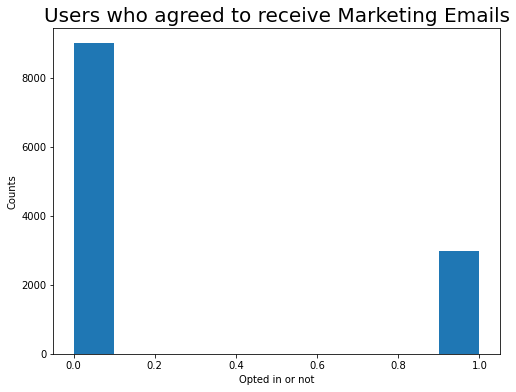

In [50]:
plt.figure(figsize = (8,6))
plt.hist(user_df['opted_in_to_mailing_list'].values, range=(0,1))
plt.xlabel('Opted in or not')
plt.ylabel('Counts')
plt.title('Users who agreed to receive Marketing Emails', size = 20);
#plt.xticks(rotation=45);

From the plot above, most users declined to receive any marketing related emails.

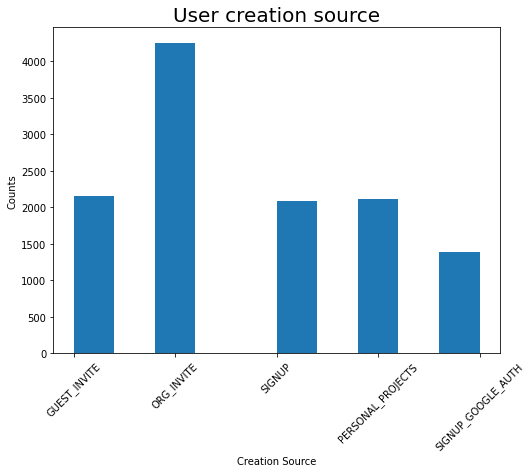

In [51]:
plt.figure(figsize = (8,6))
user_df['creation_source'].hist(grid=False)
plt.xlabel('Creation Source')
plt.ylabel('Counts')
plt.title('User creation source', size = 20)
plt.xticks(rotation=45);

In [52]:
## create adopted users

adoption_engage_df = user_engage_df.groupby(['user_id', pd.Grouper(freq='7D')]).filter(lambda x: len(x)>1).groupby('user_id').sum()
adoption_engage_df.reset_index(inplace=True)

Adopted users are user who has logged into the product on three separate
days in at least one sevenday
period

In [56]:
# merge both dataframe files
final_engage_df = user_df.merge(adoption_engage_df, how='outer', left_on='object_id', right_on='user_id')

# split time/date columns to day/month for machine learning
final_engage_df['ct_day'] = final_engage_df['creation_time'].dt.day
final_engage_df['ct_month'] = final_engage_df['creation_time'].dt.month

final_engage_df['lsct_day'] = final_engage_df['last_session_creation_time'].dt.day
final_engage_df['lsct_month'] = final_engage_df['last_session_creation_time'].dt.month

# create target variable 
final_engage_df['adopted_user'] = np.where(final_engage_df['visited'] >= 3, 'adopted', 'not_adopted')

# drop the unnecessary columns
final_engage_df.drop(columns=['user_id', 'visited','email','name', 'object_id', 'creation_time', 
                       'last_session_creation_time'], axis=1, inplace=True)


final_engage_df

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,ct_day,ct_month,lsct_day,lsct_month,adopted_user
0,GUEST_INVITE,1,0,11,10803.0,22,4,1.0,1.0,not_adopted
1,ORG_INVITE,0,0,1,316.0,15,11,1.0,1.0,adopted
2,ORG_INVITE,0,0,94,1525.0,19,3,1.0,1.0,not_adopted
3,GUEST_INVITE,0,0,1,5151.0,21,5,1.0,1.0,not_adopted
4,GUEST_INVITE,0,0,193,5240.0,17,1,1.0,1.0,not_adopted
...,...,...,...,...,...,...,...,...,...,...
11995,ORG_INVITE,0,0,89,8263.0,6,9,1.0,1.0,not_adopted
11996,SIGNUP_GOOGLE_AUTH,0,0,200,NaN,10,1,1.0,1.0,not_adopted
11997,GUEST_INVITE,1,1,83,8074.0,27,4,1.0,1.0,not_adopted
11998,PERSONAL_PROJECTS,0,0,6,NaN,31,5,1.0,1.0,not_adopted


## Preprocessing

In [57]:
# filling in missing values
print(final_engage_df.isnull().sum())

final_engage_df['invited_by_user_id'] = final_engage_df['invited_by_user_id'].fillna(0)
final_engage_df = final_engage_df.dropna()

creation_source                  0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
ct_day                           0
ct_month                         0
lsct_day                      3177
lsct_month                    3177
adopted_user                     0
dtype: int64


In [59]:
# create X and y variables, encode 'creation_source' column

X = final_engage_df.drop(columns=['adopted_user'])
X = pd.get_dummies(X, drop_first=True)

y = final_engage_df['adopted_user']

## Train-test Split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.3, random_state=42)

std = StandardScaler()

X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

# Data Modeling
Let's use dummy classifier as our baseline model

In [62]:
dclf = DummyClassifier(strategy='most_frequent')
dclf.fit(X_train_scaled,y_train)
y_pred = dclf.predict(X_test_scaled)

print('Training Score: ', dclf.score(X_train_scaled,y_train))
print('Testing Score: ', dclf.score(X_test_scaled, y_test))

Training Score:  0.8160621761658031
Testing Score:  0.8099735549678881


In [63]:
print(f1_score(y_test,y_pred, average='weighted'))
print(confusion_matrix(y_test,y_pred))

0.7249356300777091
[[   0  503]
 [   0 2144]]


In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     adopted       0.00      0.00      0.00       503
 not_adopted       0.81      1.00      0.90      2144

    accuracy                           0.81      2647
   macro avg       0.40      0.50      0.45      2647
weighted avg       0.66      0.81      0.72      2647



### Random Forest Classifier

In [70]:
rfc = RandomForestClassifier()

param_grid = {'max_depth': [10,20,30],
             'max_features': ['sqrt', 'log2'],
             'n_estimators': [150, 200, 300],
             'criterion' : ['gini', 'entropy']
             }

gs = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, scoring = 'accuracy')
gs.fit(X_train_scaled, y_train)
y_pred = gs.predict(X_test_scaled)

print("Training Accuracy: {:.2f}".format(gs.score(X_train_scaled, y_train)))
print("Test Accuracy: {:.2f}".format(gs.score(X_test_scaled, y_test)))

Training Accuracy: 0.83
Test Accuracy: 0.81


In [71]:
print("Best grid parameters are: ", (gs.best_params_))

Best grid parameters are:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}


In [72]:
print(f1_score(y_test,y_pred, average='weighted'))
print(confusion_matrix(y_test,y_pred))

0.7245618520531287
[[   0  503]
 [   2 2142]]


In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     adopted       0.00      0.00      0.00       503
 not_adopted       0.81      1.00      0.89      2144

    accuracy                           0.81      2647
   macro avg       0.40      0.50      0.45      2647
weighted avg       0.66      0.81      0.72      2647



### Feature Importance

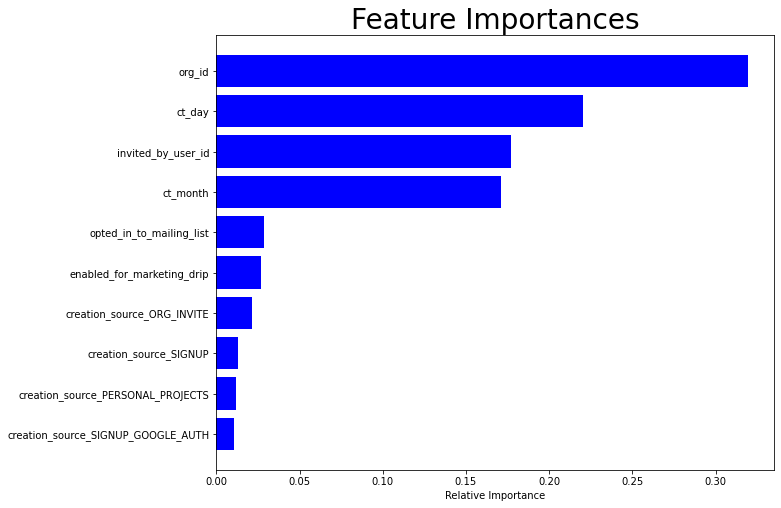

In [76]:
# check the top 10 features

features = X.columns
importances = gs.best_estimator_.feature_importances_
indices = np.argsort(importances)[-10:]  
plt.figure(figsize = (10,8))
plt.title('Feature Importances', size = 28)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Here, according to our predictive modeling, the features that help most with predicting whether a user is a adopted user or not are,

1) '`lsct_month`'

2) '`ct_month`'

3) '`lsct_day`'

4) '`ct_day`'

5) '`org_id`'

6) '`invited_by_user_id`'

The top three are in relation to when the user signed up for the service as well as their last interaction with the platform. Another interesting feature that was deemed important was '`org_id`', which means the users organization has a effect on use of service. This makes sense if a company is heavily invested within a service it will most likely make their employees use it. It is also interesting to know that prior to running the earlier i assumed '`creation_source`' would have a great effect on our model. That was not the case, this column was ranked in the lowest of 'relative importance'.